In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X, Y = np.meshgrid(x,y)

In [3]:
gamma = 5.0   ## strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    #Vortex location

In [16]:
def get_vortex_velocity(gamma, xv, yv, X, Y):
    u = +gamma / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -gamma / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    return u, v

def get_vortex_stream(gamma, xv, yv, X, Y):
    psi = gamma / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    return psi

In [5]:
def plot_fig(width):
    height = (y_end - y_start) / (x_end - x_start) * width
    plt.figure(figsize=(width, height))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(x_start, x_end)
    plt.ylim(y_start, y_end)

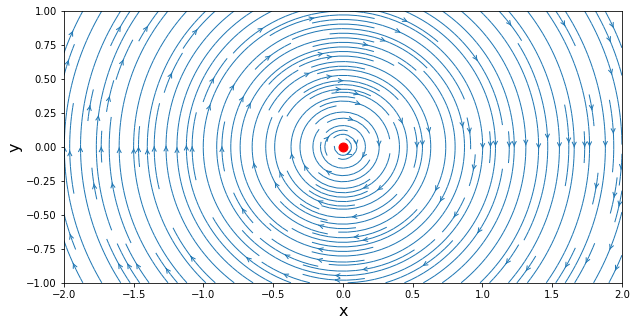

In [17]:
u_v, v_v = get_vortex_velocity(gamma, x_vortex, y_vortex, X, Y)
psi_v = get_vortex_stream(gamma,x_vortex,y_vortex,X,Y)
fig = plot_fig(10)
plt.streamplot(X,Y,u_v,v_v, density=2,linewidth=1,arrowsize=1,
              arrowstyle='->');
plt.scatter(x_vortex,y_vortex,color='r',s=80,marker='o');

In [7]:
## VORTEX & SINK 
sigma_sink = -1.0
x_sink, y_sink = 0.0, 0.0

In [33]:
def get_sink_velocity(sigma,xs,ys,X,Y):
    u = sigma / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = sigma / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

def get_sink_stream(sigma,xs,ys,X,Y):
    psi = sigma / (2 * math.pi) * np.arctan2((Y - ys), (X - xs))
    return psi


In [34]:
## sink velocity field and stream-function
u_sink, v_sink = get_sink_velocity(sigma_sink,x_sink,y_sink,X,Y)
psi_sink = get_sink_stream(sigma_sink,x_sink,y_sink,X,Y)

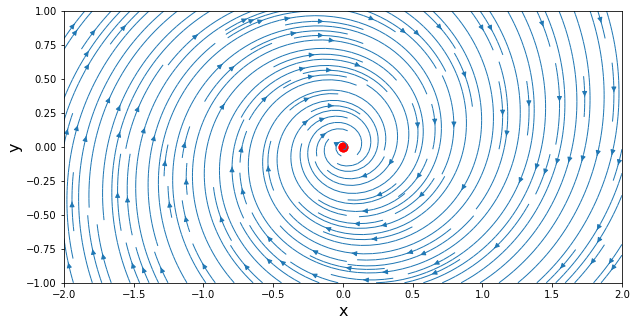

In [35]:
#Superposition of the solutions
u = u_v + u_sink
v = v_v + v_sink
psi = psi_v + psi_sink

fig_1 = plot_fig(10)
plt.streamplot(X,Y,u,v,density = 2, linewidth = 1);
plt.scatter([x_vortex,x_sink],[y_vortex,y_sink],color='r',
            s=80,marker='o');